In [1]:
import pandas as pd
import matplotlib.dates as mdates

In [2]:
# read data
data = pd.read_csv(r"../Data/Aggregated_Final_Lin_Rakeen_Fixed_returns.csv")

In [3]:
# copy without warnings
pd.options.mode.chained_assignment = None

In [4]:
# # make sweetviz report
# import sweetviz as sv

# report = sv.analyze(data)

# # save report
# report.show_html("../EDA/fixed_return_report.html")

In [5]:
# drop magnitude and Direction columns
data = data.drop(columns=["magnitude", "Direction"])
data.head(15)

,date_dt,positive_count_bitcoin,negative_count_bitcoin,neutral_count_bitcoin,positive_avg_score_bitcoin,negative_avg_score_bitcoin,neutral_avg_score_bitcoin,total_news_count_bitcoin,total_news_score_bitcoin,signal_bitcoin,...,T5YIE_lag1,T5YIE_lag2,S&P500_Close_lag1,S&P500_Close_lag2,VIX_Close_lag1,VIX_Close_lag2,S&P_Return_lag1,S&P_Return_lag2,gg_trend,Daily Return
0,2021-04-22,1.0,1.0,5.0,0.642198,0.476258,0.731610,7.0,0.165941,0.000000,...,2.52,2.56,4134.939941,4163.259766,18.680000,17.290001,-0.006802,-0.005307,0.137663,-0.040582
1,2021-04-23,1.0,1.0,5.0,0.642198,0.476258,0.731610,7.0,0.165941,0.000000,...,2.53,2.52,4173.419922,4134.939941,17.500000,18.680000,0.009306,-0.006802,0.137663,-0.013001
2,2021-04-24,1.0,11.0,3.0,0.586267,0.906848,0.899653,15.0,-9.389061,-0.833333,...,2.42,2.53,4134.979980,4173.419922,18.709999,17.500000,-0.009211,0.009306,0.137663,-0.020620
3,2021-04-25,1.0,11.0,3.0,0.586267,0.906848,0.899653,15.0,-9.389061,-0.833333,...,2.44,2.42,4180.169922,4134.979980,17.330000,18.709999,0.010929,-0.009211,0.018928,-0.021133
4,2021-04-26,1.0,11.0,3.0,0.586267,0.906848,0.899653,15.0,-9.389061,-0.833333,...,2.44,2.44,4180.169922,4180.169922,17.330000,17.330000,0.000000,0.010929,0.018928,0.097480
5,2021-04-27,4.0,0.0,4.0,0.667552,0.000000,0.856313,8.0,2.670206,1.000000,...,2.44,2.44,4180.169922,4180.169922,17.330000,17.330000,0.000000,0.000000,0.018928,0.018548
6,2021-04-28,4.0,0.0,4.0,0.667552,0.000000,0.856313,8.0,2.670206,1.000000,...,2.47,2.44,4187.620117,4180.169922,17.639999,17.330000,0.001782,0.000000,0.018928,-0.003794
7,2021-04-29,4.0,0.0,4.0,0.667552,0.000000,0.856313,8.0,2.670206,1.000000,...,2.51,2.47,4186.720215,4187.620117,17.559999,17.639999,-0.000215,0.001782,0.018928,-0.023430
8,2021-04-30,3.0,1.0,4.0,0.758420,0.778473,0.956340,8.0,1.496786,0.500000,...,2.54,2.51,4183.180176,4186.720215,17.280001,17.559999,-0.000846,-0.000215,0.018928,0.075415
9,2021-05-01,3.0,1.0,4.0,0.758420,0.778473,0.956340,8.0,1.496786,0.500000,...,2.56,2.54,4211.470215,4183.180176,17.610001,17.280001,0.006763,-0.000846,0.018928,0.001348


**Linear Regression Implementation**

In [6]:
# linear regression model
from sklearn.linear_model import LinearRegression


data.set_index("date_dt", inplace=True)
data.index = pd.to_datetime(data.index)

# convert return to moving average
data["Daily_Return_rolling_15_avg"] = data["Daily Return"].rolling(window=15).mean()
data.dropna(inplace=True)
data.head(20)

,positive_count_bitcoin,negative_count_bitcoin,neutral_count_bitcoin,positive_avg_score_bitcoin,negative_avg_score_bitcoin,neutral_avg_score_bitcoin,total_news_count_bitcoin,total_news_score_bitcoin,signal_bitcoin,TWITTER_SENTIMENT_DAILY_AVG,...,T5YIE_lag2,S&P500_Close_lag1,S&P500_Close_lag2,VIX_Close_lag1,VIX_Close_lag2,S&P_Return_lag1,S&P_Return_lag2,gg_trend,Daily Return,Daily_Return_rolling_15_avg
date_dt,,,,,,,,,,,,,,,,,,,,,
2021-05-06,0.0,1.0,2.0,0.000000,0.827074,0.900657,3.0,-0.827074,-1.000000,-0.0058,...,2.60,4164.660156,4192.660156,19.480000,18.309999,-0.006678,0.002748,0.122346,-0.018055,0.003011
2021-05-07,0.0,1.0,2.0,0.000000,0.827074,0.900657,3.0,-0.827074,-1.000000,-0.0075,...,2.62,4167.589844,4164.660156,19.150000,19.480000,0.000703,-0.006678,0.122346,0.016877,0.006842
2021-05-08,0.0,1.0,2.0,0.000000,0.827074,0.900657,3.0,-0.827074,-1.000000,-0.0228,...,2.68,4201.620117,4167.589844,18.389999,19.150000,0.008165,0.000703,0.122346,0.024922,0.009370
2021-05-09,0.0,1.0,2.0,0.000000,0.827074,0.900657,3.0,-0.827074,-1.000000,-0.0228,...,2.66,4232.600098,4201.620117,16.690001,18.389999,0.007373,0.008165,0.105151,-0.009766,0.010093
2021-05-10,2.0,1.0,0.0,0.869209,0.913061,0.000000,3.0,0.825356,0.333333,-0.0228,...,2.65,4232.600098,4232.600098,16.690001,16.690001,0.000000,0.007373,0.105151,-0.041596,0.008729
2021-05-11,2.0,1.0,0.0,0.869209,0.913061,0.000000,3.0,0.825356,0.333333,0.0048,...,2.65,4232.600098,4232.600098,16.690001,16.690001,0.000000,0.000000,0.105151,0.015010,0.003231
2021-05-12,2.0,0.0,0.0,0.949838,0.000000,0.000000,2.0,1.899676,1.000000,0.0153,...,2.65,4188.430176,4232.600098,19.660000,16.690001,-0.010436,0.000000,0.105151,-0.142967,-0.007536
2021-05-13,2.0,0.0,0.0,0.949838,0.000000,0.000000,2.0,1.899676,1.000000,0.0130,...,2.71,4152.100098,4188.430176,21.840000,19.660000,-0.008674,-0.010436,0.105151,0.011443,-0.006521
2021-05-14,1.0,8.0,2.0,0.906305,0.798987,0.774572,11.0,-5.485593,-0.777778,-0.0168,...,2.68,4063.040039,4152.100098,27.590000,21.840000,-0.021449,-0.008674,0.105151,0.003300,-0.004739


In [7]:
from sklearn.metrics import mean_squared_error
import joblib

data = data.dropna()

# Featues chosen based on pearson correlation
cols = [
    "stoch_%K",
    "stoch_%D",
    "S&P500 Return",
    "rsi",
    "negative_count_bitcoin",
    "positive_count_bitcoin",
    "total_news_score_bitcoin",
    "negative_avg_score_bitcoin",
    "positive_avg_score_bitcoin",
    "signal_bitcoin",
    "gg_trend",
    "Daily_Return_rolling_15_avg",
]
X = data[cols].drop(columns=["Daily_Return_rolling_15_avg"])
# cumulative sum for last 100 days of news sentiment
X["total_news_score_lag_100_sum_bit"] = (
    data["total_news_score_bitcoin"].rolling(100).sum()
)
X["total_news_score_lag_100_sum_coin"] = (
    data["total_news_score_coinbase"].rolling(100).sum()
)
y = data["Daily_Return_rolling_15_avg"]

# drop null values
X = X.dropna()
y = y[y.index.isin(X.index)]

split_date = "2023-03-01"
X_train = X[X.index < split_date]
X_test = X[X.index >= split_date]
y_train = y[y.index < split_date]
y_test = y[y.index >= split_date]

# fit model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r_squared = model.score(X_test, y_test)
print(f"R Squared: {r_squared}")

# print adjusted r squared
n = X_test.shape[0]
p = X_test.shape[1]
adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(f"Adjusted R Squared: {adj_r_squared}")

# save model
joblib.dump(model, "../Modeling/models/LR_model_ideal.pkl")

Mean Squared Error: 1.8128805438112913e-05
R Squared: 0.5703388500450777
Adjusted R Squared: 0.5552833380520481


['../Modeling/models/LR_model_ideal.pkl']

**Calculating Results**

In [8]:
# make a dataframe with y_test and y_pred
results = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

# compute residuals
results["residuals"] = results["y_test"] - results["y_pred"]

# save results
# results.to_csv("../Modeling/models/LR_results_ideal.csv")

daily_test_returns = data[data.index >= split_date]["Daily Return"]
daily_close = data[data.index >= split_date]["Close"].shift(-1)
daily_open = data[data.index >= split_date]["Open"].shift(-1)

**PLotting Results**

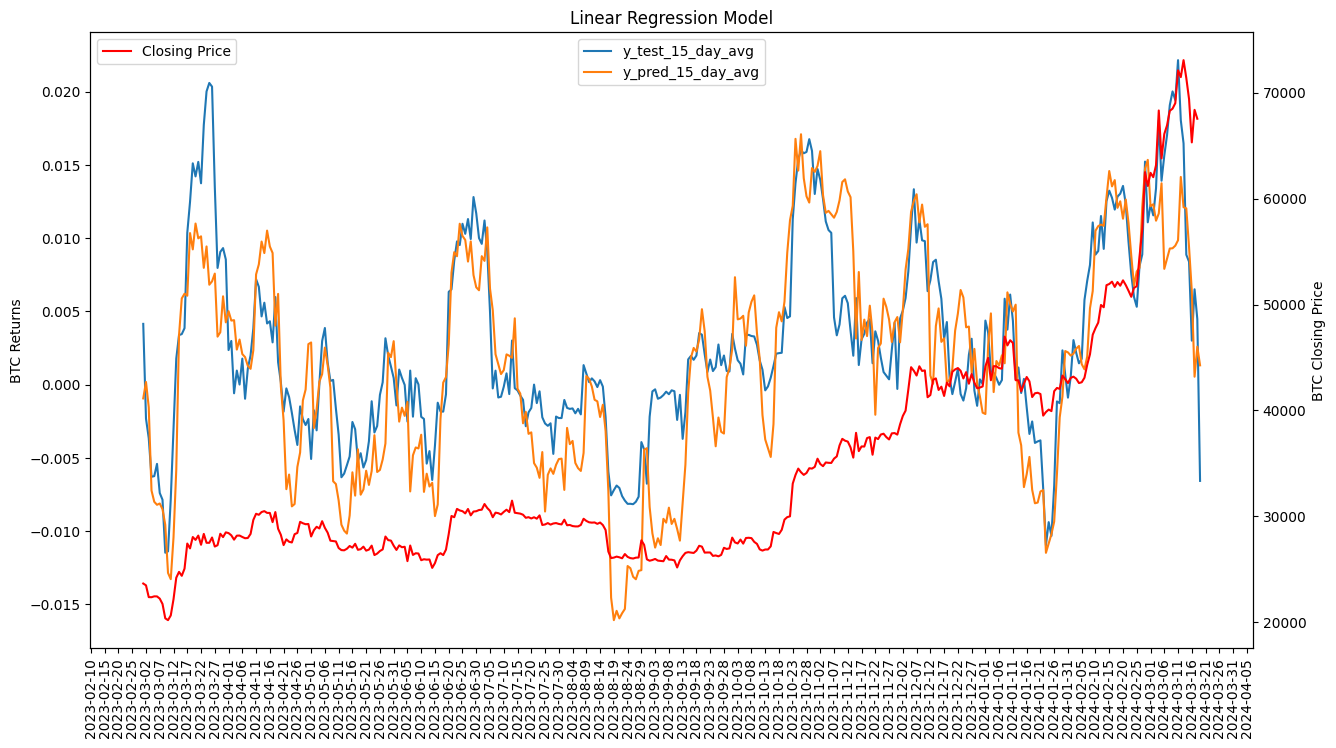

In [9]:
# plot results
import matplotlib.pyplot as plt

plt.plot(results["y_test"], label="y_test_15_day_avg")
plt.plot(results["y_pred"], label="y_pred_15_day_avg")
plt.legend(loc="upper center")
plt.title("Linear Regression Model")
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 8)
# Set x-axis major ticks to occur every 300 days.
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.ylabel("BTC Returns")

# plot the close price on the same graph on the right axis
plt.twinx()
plt.plot(daily_close, color="red", label="Closing Price")
plt.legend(loc="upper left")
plt.ylabel("BTC Closing Price")

plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 8)
# Set x-axis major ticks to occur every 300 days.
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))


plt.show()

> According to the following results, the baseline model beats the ransom model.

In [10]:
# # see if direction was right
# results["direction"] = daily_test_returns * results["y_pred"]
# results["direction"] = results["direction"].apply(lambda x: 1 if x > 0 else 0)

# # print accuracy
# accuracy = results["direction"].sum() / results["direction"].count()
# print(f"Linear Regression Daily Direction Accuracy: {accuracy}")

# results["actual_direction"] = daily_test_returns.apply(lambda x: 1 if x > 0 else 0)

# # print confusion matrix
# from sklearn.metrics import confusion_matrix

# confusion_matrix = confusion_matrix(results["direction"], results["actual_direction"])
# print(confusion_matrix)

# # write out true positive, false positive, true negative, false negative
# tp = confusion_matrix[0][0]
# fp = confusion_matrix[0][1]
# fn = confusion_matrix[1][0]
# tn = confusion_matrix[1][1]

# print(f"True Positives: {tp}")
# print(f"False Positives: {fp}")
# print(f"False Negatives: {fn}")
# print(f"True Negatives: {tn}")

# # calculate precision
# precision = tp / (tp + fp)
# print(f"Precision: {precision}")

# # calculate recall
# recall = tp / (tp + fn)
# print(f"Recall: {recall}")

# # calculate f1 score
# f1 = 2 * (precision * recall) / (precision + recall)
# print(f"F1 Score: {f1}")

# # make a column that picks direction randomly
# import random

# accuracies = []

# for _ in range(90000):
#     results["random_direction"] = results["y_pred"].apply(
#         lambda x: random.choice([-1, 1])
#     )
#     results["random_direction"] = results["random_direction"] * daily_test_returns
#     results["random_direction"] = results["random_direction"].apply(
#         lambda x: 1 if x > 0 else 0
#     )

#     # calculate accuracy
#     accuracy = results["random_direction"].sum() / results["random_direction"].count()
#     accuracies.append(accuracy)

# # print mean accuracy
# print(f"Mean Random Daily Direction Accuracy: {sum(accuracies) / len(accuracies)}")

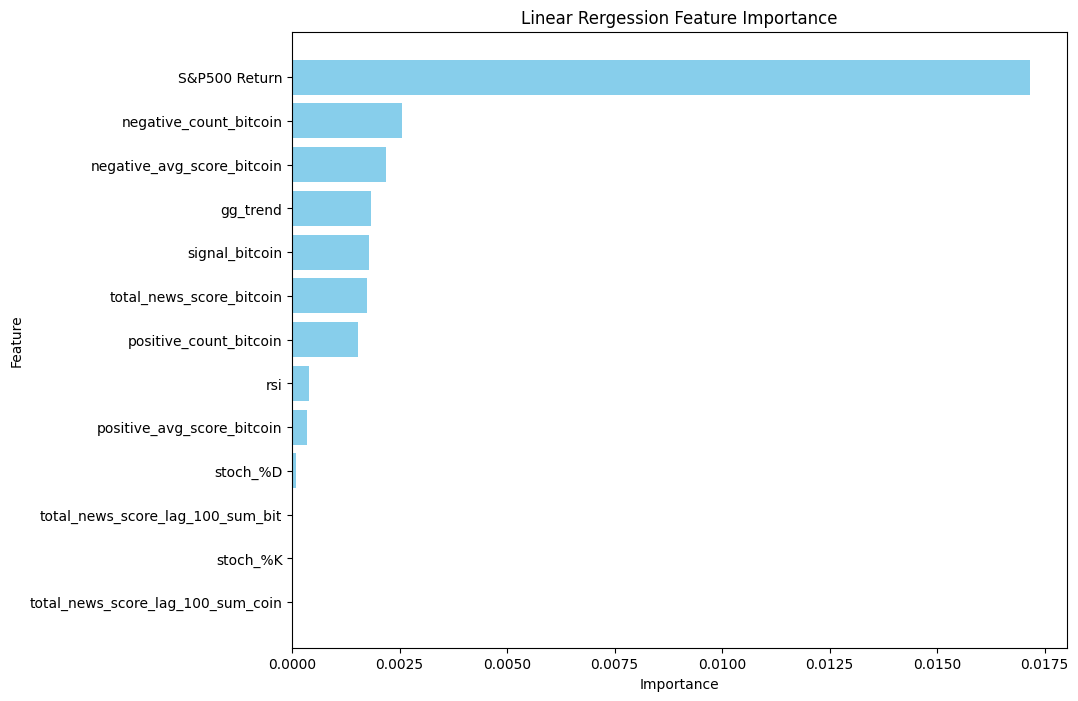

In [11]:
import matplotlib.pyplot as plt

# Feature importance
importance = model.coef_
feature_importance = pd.DataFrame(
    {"Feature": X_train.columns, "Importance": importance}
)

# Sort by absolute value of importance
feature_importance["Importance"] = feature_importance["Importance"].abs()
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(
    feature_importance["Feature"], feature_importance["Importance"], color="skyblue"
)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Linear Rergession Feature Importance")
plt.gca().invert_yaxis()  # Invert y axis to have the most important feature at top
plt.show()

**Random Forest Implementatin**

In [12]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np


def train_evaluate_and_plot(X_train, y_train, X_test, y_test, daily_close, plot_title):
    model = RandomForestRegressor()
    # fit model
    model.fit(X_train, y_train)

    # make predictions
    y_pred = model.predict(X_test)

    # evaluate model
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")

    r_squared = model.score(X_test, y_test)
    print(f"R Squared: {r_squared}")

    # make a dataframe with y_test and y_pred
    results = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

    # compute residuals
    results["residuals"] = results["y_test"] - results["y_pred"]

    # plot results
    plt.plot(results["y_test"], label="y_test_15_day_avg")
    plt.plot(results["y_pred"], label="y_pred_15_day_avg")
    plt.legend(loc="upper center")
    plt.title(plot_title)
    plt.xticks(rotation=90)
    plt.gcf().set_size_inches(15, 8)
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
    plt.ylabel("BTC Returns")

    # plot the close price on the same graph on the right axis
    plt.twinx()
    plt.plot(daily_close, color="red", label="Close")
    plt.legend(loc="upper left")
    plt.ylabel("BTC Close Price")

    plt.xticks(rotation=90)
    plt.gcf().set_size_inches(15, 8)
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

    plt.show()

    # feature importance
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")
    for f in range(X_train.shape[1]):
        print(f"{f + 1}. {X_train.columns[indices[f]]} ({importances[indices[f]]})")

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X_train.shape[1]), importances[indices], align="center")
    plt.xticks(range(X_train.shape[1]), np.array(X_train.columns)[indices], rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.gcf().set_size_inches(15, 8)
    plt.show()

    return model, results

Mean Squared Error: 1.3947571955780669e-05
R Squared: 0.6694360350406217


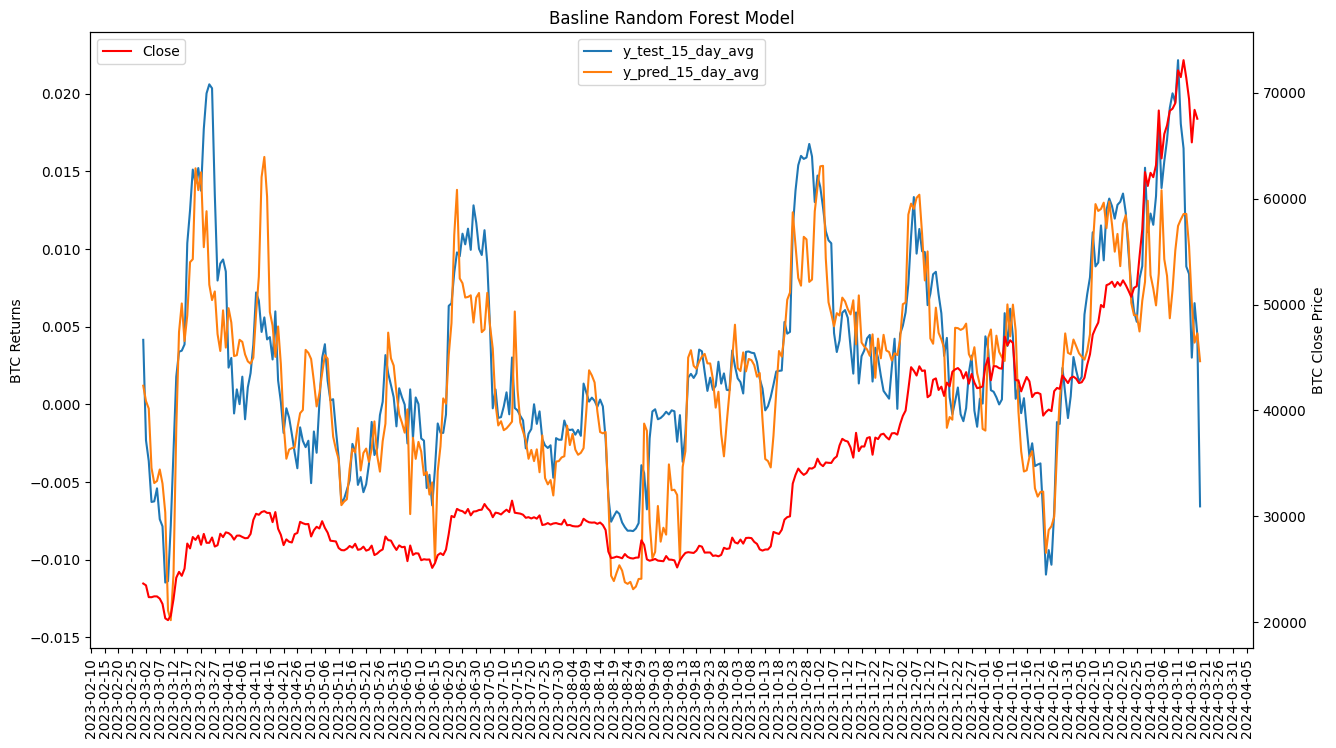

Feature ranking:
1. rsi (0.4221922652729697)
2. stoch_%D (0.3212033278405942)
3. macd (0.017852590685705293)
4. TWITTER_NEG_SENTIMENT_COUNT (0.012614764885511848)
5. S&P500 Close (0.012600824149751815)
6. ATR (0.010855628630810741)
7. S&P500_Close_lag2 (0.010210596451281261)
8. DGS10 (0.009945422844396836)
9. stoch_%K (0.009519711975368281)
10. S&P500_Close_lag1 (0.0073554723452712014)
11. neutral_avg_score_coinbase (0.00652606231186854)
12. 30D_Moving_STD (0.005893732645428634)
13. macd_signal (0.005834531158299761)
14. gg_trend (0.005735238613013151)
15. TWITTER_SENTIMENT_DAILY_AVG (0.005597033110339545)
16. total_news_count_coinbase (0.00509694310676167)
17. DGS10_lag1 (0.004687270472266995)
18. Parkinson_Volatility (0.00467007937274611)
19. TWITTER_POS_SENTIMENT_COUNT (0.004565494466164181)
20. negative_avg_score_bitcoin (0.004528280635533919)
21. Middle Band (0.00437043208718882)
22. total_news_count_bitcoin (0.004327453203639527)
23. total_news_score_coinbase (0.00422447488801756

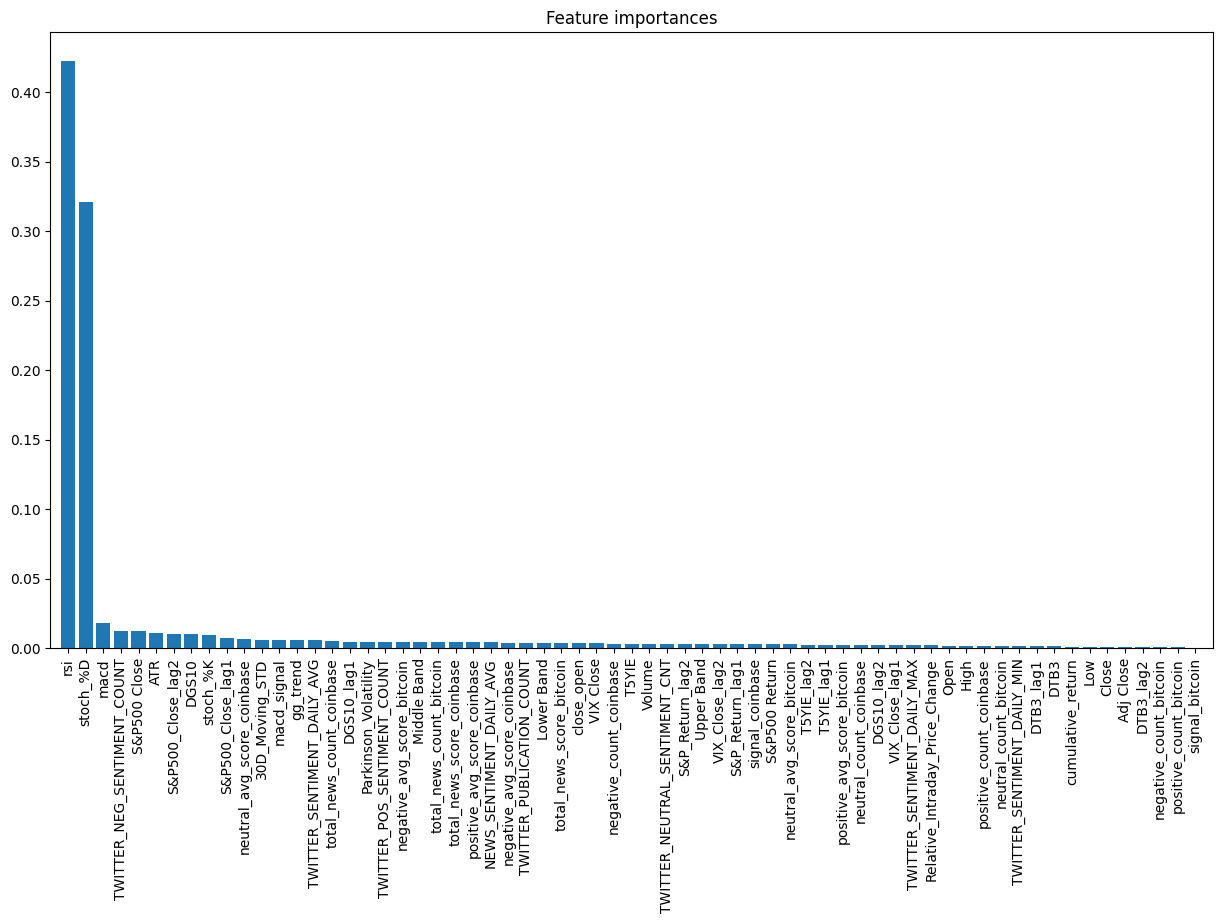

In [13]:
# random forest model
data = data.dropna(subset=["Daily_Return_rolling_15_avg"])

X = data.drop(
    columns=[
        "Daily_Return_rolling_15_avg",
        "Daily Return",
    ]
)
y = data["Daily_Return_rolling_15_avg"]


split_date = "2023-03-01"
X_train = X[X.index < split_date]
X_test = X[X.index >= split_date]
y_train = y[y.index < split_date]
y_test = y[y.index >= split_date]

model, results = train_evaluate_and_plot(
    X_train, y_train, X_test, y_test, daily_close, "Basline Random Forest Model"
)

In [14]:
# calculate metrics
results["actual_direction"] = results["y_test"].apply(lambda x: 1 if x > 0 else 0)
results["Pred_direction"] = results["y_pred"].apply(lambda x: 1 if x > 0 else 0)

tp = results[
    (results["actual_direction"] == 1) & (results["Pred_direction"] == 1)
].shape[0]
fp = results[
    (results["actual_direction"] == 0) & (results["Pred_direction"] == 1)
].shape[0]
fn = results[
    (results["actual_direction"] == 1) & (results["Pred_direction"] == 0)
].shape[0]
tn = results[
    (results["actual_direction"] == 0) & (results["Pred_direction"] == 0)
].shape[0]

print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Negatives: {tn}")

# calculate precision
precision = tp / (tp + fp)
print(f"Precision: {precision}")

# calculate recall
recall = tp / (tp + fn)
print(f"Recall: {recall}")

# calculate f1 score
f1 = 2 * (precision * recall) / (precision + recall)
print(f"F1 Score: {f1}")

# calculate accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"Accuracy: {accuracy}")

True Positives: 213
False Positives: 23
False Negatives: 27
True Negatives: 122
Precision: 0.902542372881356
Recall: 0.8875
F1 Score: 0.8949579831932774
Accuracy: 0.8701298701298701


**ROlling sum Features Experiment**

Mean Squared Error: 1.2562708531737451e-05
R Squared: 0.7022579445335648


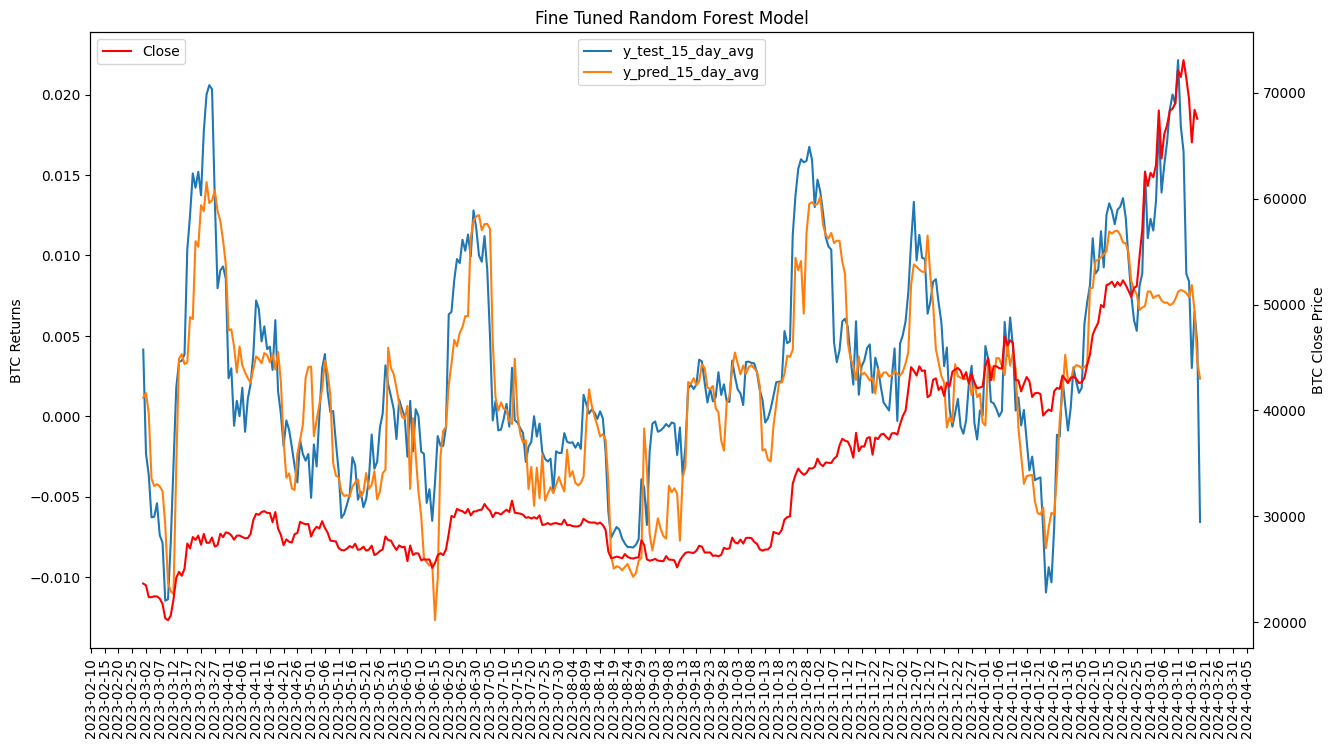

Feature ranking:
1. rsi (0.3016423264219619)
2. stoch_%D (0.24815114003633718)
3. stoch_%K_rolling_10 (0.08763856101687541)
4. negative_count_coinbase_rolling_10 (0.029276546925354946)
5. Relative_Intraday_Price_Change_rolling_10 (0.02766767199130901)
6. Relative_Intraday_Price_Change_rolling_20 (0.018377876291441)
7. stoch_%K (0.018313928275080597)
8. close_open_rolling_10 (0.012154627138281962)
9. total_news_score_coinbase_rolling_10 (0.011101303756493024)
10. stoch_%D_rolling_10 (0.010713618966947924)
11. close_open_rolling_20 (0.007755594832088738)
12. negative_count_bitcoin_rolling_10 (0.006969436192140966)
13. macd_signal_rolling_20 (0.0068985227601980415)
14. gg_trend_rolling_20 (0.0065056291152661115)
15. gg_trend_rolling_30 (0.005853053361324839)
16. T5YIE_rolling_20 (0.004628891084131512)
17. total_news_score_bitcoin_rolling_30 (0.0045458752720538)
18. positive_avg_score_coinbase_rolling_30 (0.0041957932645532775)
19. neutral_count_bitcoin_rolling_20 (0.0027691802580405885)
2

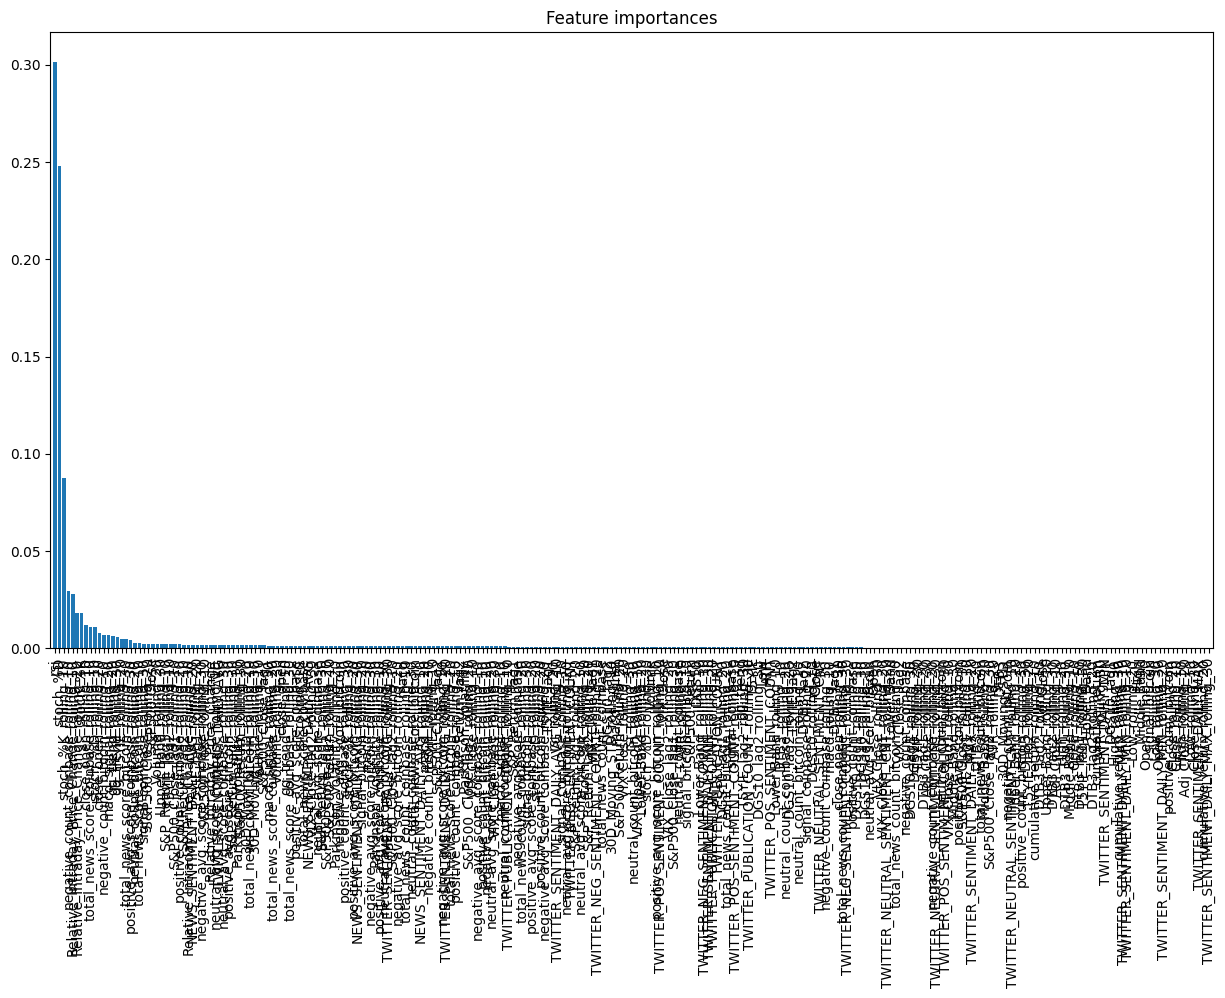

In [15]:
# Define the number of lags
n_lags = 3

# Create a new DataFrame for lagged features
lagged_features = []
lagged_features_cols = []

data = data.dropna(subset=["Daily_Return_rolling_15_avg"])

X_now = data.drop(
    columns=[
        "Daily_Return_rolling_15_avg",
        "Daily Return",
    ]
)
y_now = data["Daily_Return_rolling_15_avg"]

# Create lagged versions of features
for column in X_now.columns:
    for lag in range(1, n_lags + 1):
        lagged_features.append(X_now[column].rolling(lag * 10).sum())
        lagged_features_cols.append(f"{column}_rolling_{lag * 10}")

lagged_features = pd.concat(lagged_features, axis=1)
lagged_features.columns = lagged_features_cols

# Concatenate the original DataFrame with the DataFrame of lagged features
X_now = pd.concat([X_now, lagged_features], axis=1)

# Drop rows with NaN values caused by lagging in both X and y
X_now = X_now.dropna()
y_now = y_now[X_now.index]

# Split the data again after creating lagged features
X_train = X_now[X_now.index < split_date]
X_test = X_now[X_now.index >= split_date]
y_train = y_now[y_now.index < split_date]
y_test = y_now[y_now.index >= split_date]

# Train, evaluate, and plot the model
model, results = train_evaluate_and_plot(
    X_train, y_train, X_test, y_test, daily_close, "Fine Tuned Random Forest Model"
)

In [16]:
# calculate metrics
results["actual_direction"] = results["y_test"].apply(lambda x: 1 if x > 0 else 0)
results["Pred_direction"] = results["y_pred"].apply(lambda x: 1 if x > 0 else 0)

tp = results[
    (results["actual_direction"] == 1) & (results["Pred_direction"] == 1)
].shape[0]
fp = results[
    (results["actual_direction"] == 0) & (results["Pred_direction"] == 1)
].shape[0]
fn = results[
    (results["actual_direction"] == 1) & (results["Pred_direction"] == 0)
].shape[0]
tn = results[
    (results["actual_direction"] == 0) & (results["Pred_direction"] == 0)
].shape[0]

print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Negatives: {tn}")

# calculate precision
precision = tp / (tp + fp)
print(f"Precision: {precision}")

# calculate recall
recall = tp / (tp + fn)
print(f"Recall: {recall}")

# calculate f1 score
f1 = 2 * (precision * recall) / (precision + recall)
print(f"F1 Score: {f1}")

# calculate accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"Accuracy: {accuracy}")

True Positives: 216
False Positives: 24
False Negatives: 24
True Negatives: 121
Precision: 0.9
Recall: 0.9
F1 Score: 0.9
Accuracy: 0.8753246753246753


**Making another model with best features**

Mean Squared Error: 1.1206655142365218e-05
R Squared: 0.7343970427585935


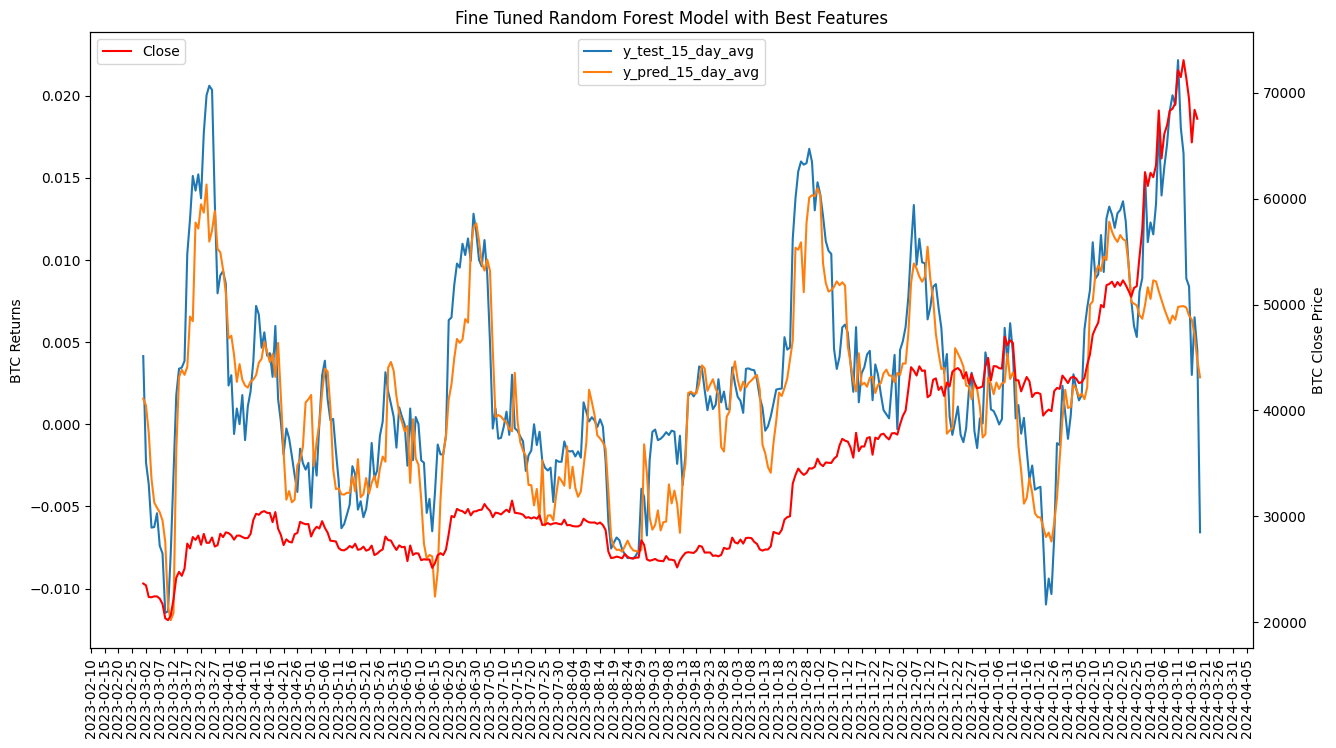

Feature ranking:
1. stoch_%D (0.3077382705518401)
2. rsi (0.2653791774910783)
3. stoch_%K_rolling_10 (0.08397707429736911)
4. Relative_Intraday_Price_Change_rolling_10 (0.04806069417828029)
5. stoch_%K (0.02430902323929213)
6. total_news_score_coinbase_rolling_10 (0.019962771941529258)
7. negative_count_coinbase_rolling_10 (0.019333402049637707)
8. Relative_Intraday_Price_Change_rolling_20 (0.01849143056171073)
9. macd_signal_rolling_20 (0.017170417402398646)
10. close_open_rolling_20 (0.01660110502179878)
11. close_open_rolling_10 (0.01522030537626105)
12. gg_trend_rolling_20 (0.012552551048119046)
13. stoch_%D_rolling_10 (0.012219759866489053)
14. gg_trend_rolling_30 (0.011964749489639112)
15. T5YIE_rolling_20 (0.011644901965544874)
16. total_news_score_bitcoin_rolling_30 (0.011009913828237624)
17. signal_coinbase_rolling_30 (0.009228313474053071)
18. negative_count_bitcoin_rolling_10 (0.008567502616806352)
19. neutral_count_bitcoin_rolling_20 (0.00851765635996732)
20. positive_avg_s

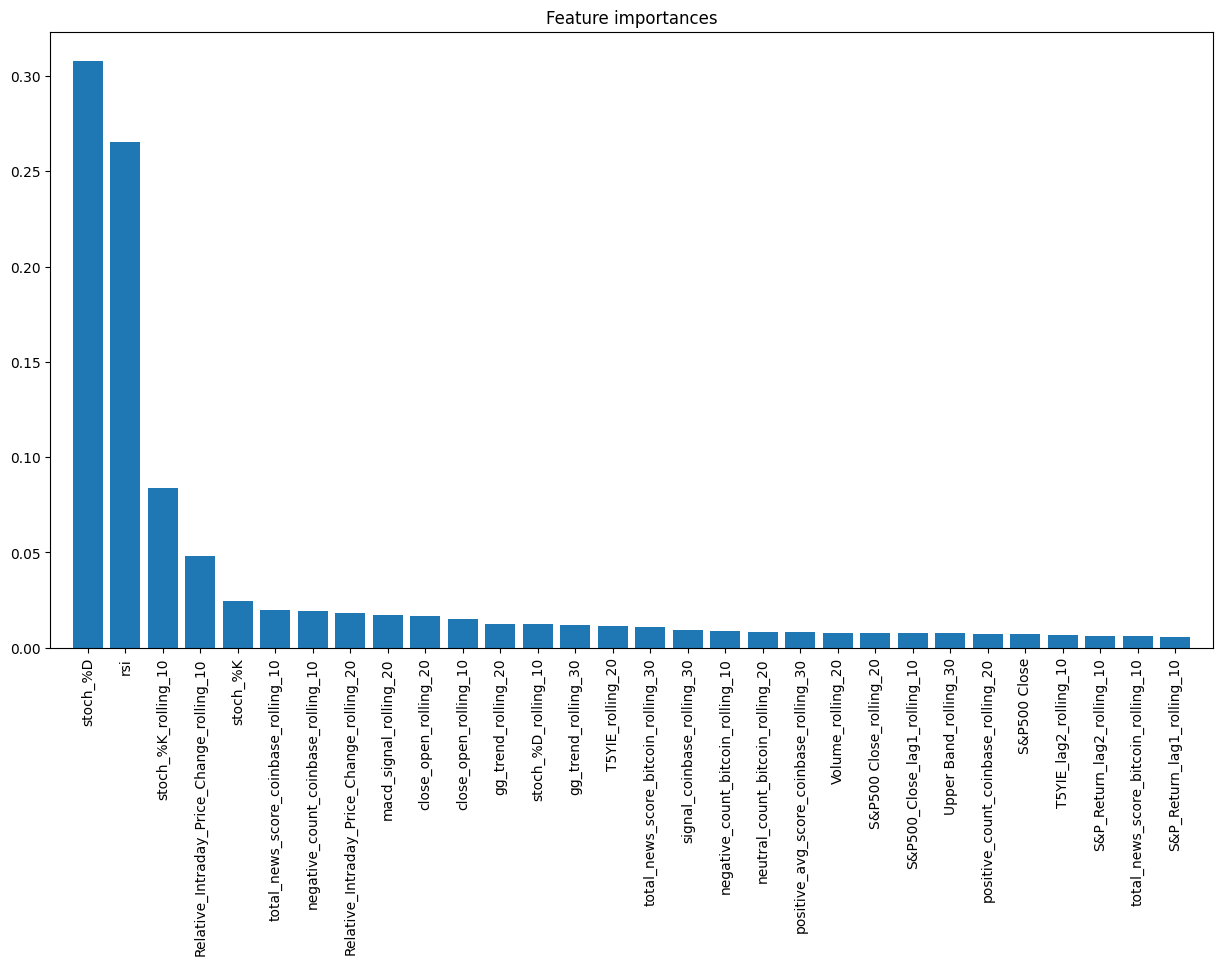

In [17]:
# make another model with best features from the above random forest model
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
cols = np.array(X_train.columns)[indices][:30]
X = X_now[cols]
y = y_now

split_date = "2023-03-01"
X_train = X[X.index < split_date]
X_test = X[X.index >= split_date]
y_train = y[y.index < split_date]
y_test = y[y.index >= split_date]

model, results = train_evaluate_and_plot(
    X_train,
    y_train,
    X_test,
    y_test,
    daily_close,
    "Fine Tuned Random Forest Model with Best Features",
)

In [18]:
# calculate metrics
results["actual_direction"] = results["y_test"].apply(lambda x: 1 if x > 0 else 0)
results["Pred_direction"] = results["y_pred"].apply(lambda x: 1 if x > 0 else 0)

tp = results[
    (results["actual_direction"] == 1) & (results["Pred_direction"] == 1)
].shape[0]
fp = results[
    (results["actual_direction"] == 0) & (results["Pred_direction"] == 1)
].shape[0]
fn = results[
    (results["actual_direction"] == 1) & (results["Pred_direction"] == 0)
].shape[0]
tn = results[
    (results["actual_direction"] == 0) & (results["Pred_direction"] == 0)
].shape[0]

print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Negatives: {tn}")

# calculate precision
precision = tp / (tp + fp)
print(f"Precision: {precision}")

# calculate recall
recall = tp / (tp + fn)
print(f"Recall: {recall}")

# calculate f1 score
f1 = 2 * (precision * recall) / (precision + recall)
print(f"F1 Score: {f1}")

# calculate accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"Accuracy: {accuracy}")

True Positives: 218
False Positives: 23
False Negatives: 22
True Negatives: 122
Precision: 0.9045643153526971
Recall: 0.9083333333333333
F1 Score: 0.9064449064449064
Accuracy: 0.8831168831168831


In [19]:
results

,y_test,y_pred,residuals,actual_direction,Pred_direction
date_dt,,,,,
2023-03-01,0.004146,0.001567,0.002579,1,1
2023-03-02,-0.002323,0.001140,-0.003463,0,1
2023-03-03,-0.003656,-0.000525,-0.003131,0,0
2023-03-04,-0.006291,-0.003329,-0.002963,0,0
2023-03-05,-0.006252,-0.004763,-0.001489,0,0
...,...,...,...,...,...
2024-03-15,0.008388,0.006614,0.001774,1,1
2024-03-16,0.003000,0.006362,-0.003361,1,1
2024-03-17,0.006508,0.005424,0.001084,1,1


<Figure size 2000x1000 with 0 Axes>

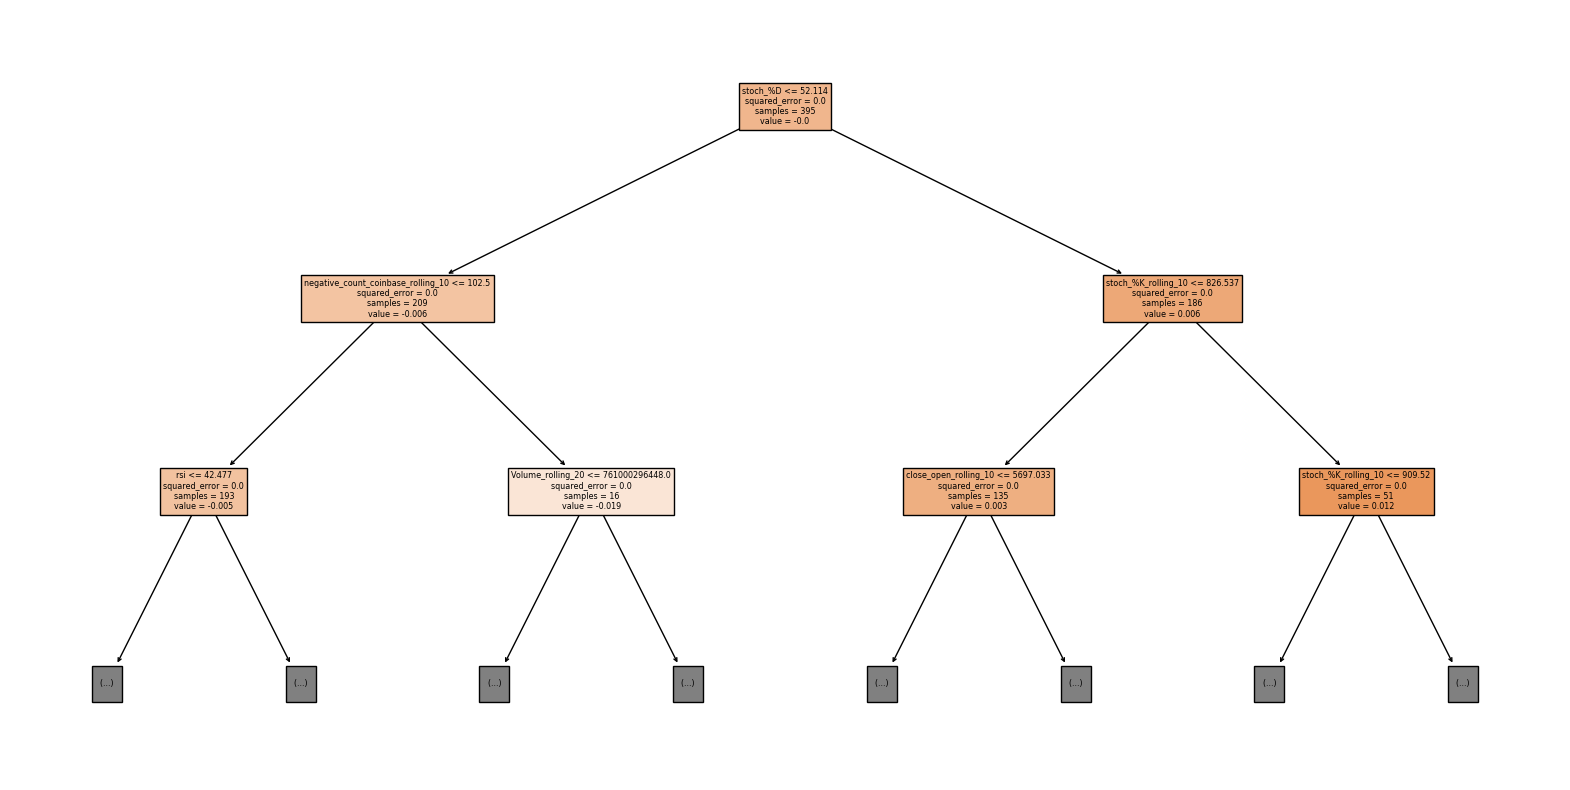

<Figure size 2000x1000 with 0 Axes>

In [20]:
# first 2 layers of random forest model, to see how the model is making decisions, only 2 layers are shown
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[3], feature_names=X_train.columns, filled=True, max_depth=2)

plt.figure(figsize=(20, 10))

**Randomized Grid Search on RF**

In [21]:
# from sklearn.model_selection import RandomizedSearchCV

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start=200, stop=20000, num=50)]
# # Number of features to consider at every split
# max_features = ["sqrt", "log2"]
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 200, num=11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10, 20, 40, 80, 160, 320, 640, 1280]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]

# # Create the random grid
# random_grid = {
#     "n_estimators": n_estimators,
#     "max_features": max_features,
#     "max_depth": max_depth,
#     "min_samples_split": min_samples_split,
#     "min_samples_leaf": min_samples_leaf,
#     "bootstrap": bootstrap,
# }

# # Use the random grid to search for best hyperparameters
# rf = RandomForestRegressor()
# rf_random = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=random_grid,
#     n_iter=100,
#     cv=2,
#     verbose=2,
#     random_state=21,
#     n_jobs=-1,
# )
# # Fit the random search model
# rf_random.fit(X_train, y_train)

# # Print the best parameters
# print(rf_random.best_params_)

# # Save the best model
# joblib.dump(
#     rf_random.best_estimator_,
#     "../Modeling/models/ideal_RF/model_random_forest_best.pkl",
# )

# # Make predictions
# y_pred = rf_random.best_estimator_.predict(X_test)

# # Evaluate model
# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")

# r_squared = rf_random.best_estimator_.score(X_test, y_test)
# print(f"R Squared: {r_squared}")

# # Make a dataframe with y_test and y_pred
# results = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

# # Compute residuals
# results["residuals"] = results["y_test"] - results["y_pred"]

# # Save results
# results.to_csv("../Modeling/models/ideal_RF/results_random_forest_best.csv")

# # Plot results
# plt.plot(results["y_test"], label="y_test_15_day_avg")
# plt.plot(results["y_pred"], label="y_pred_15_day_avg")
# plt.legend(loc="upper center")
# plt.title("Random Forest Model")

# # Plot the close price on the same graph on the right axis
# plt.twinx()
# plt.plot(daily_close, color="red", label="Close")
# plt.legend(loc="upper left")
# plt.ylabel("BTC Close Price")

# plt.gcf().set_size_inches(15, 8)
# # Set x-axis major ticks to occur every 300 days.
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
# plt.xticks(rotation=90)


# plt.show()

**Demo strategy**

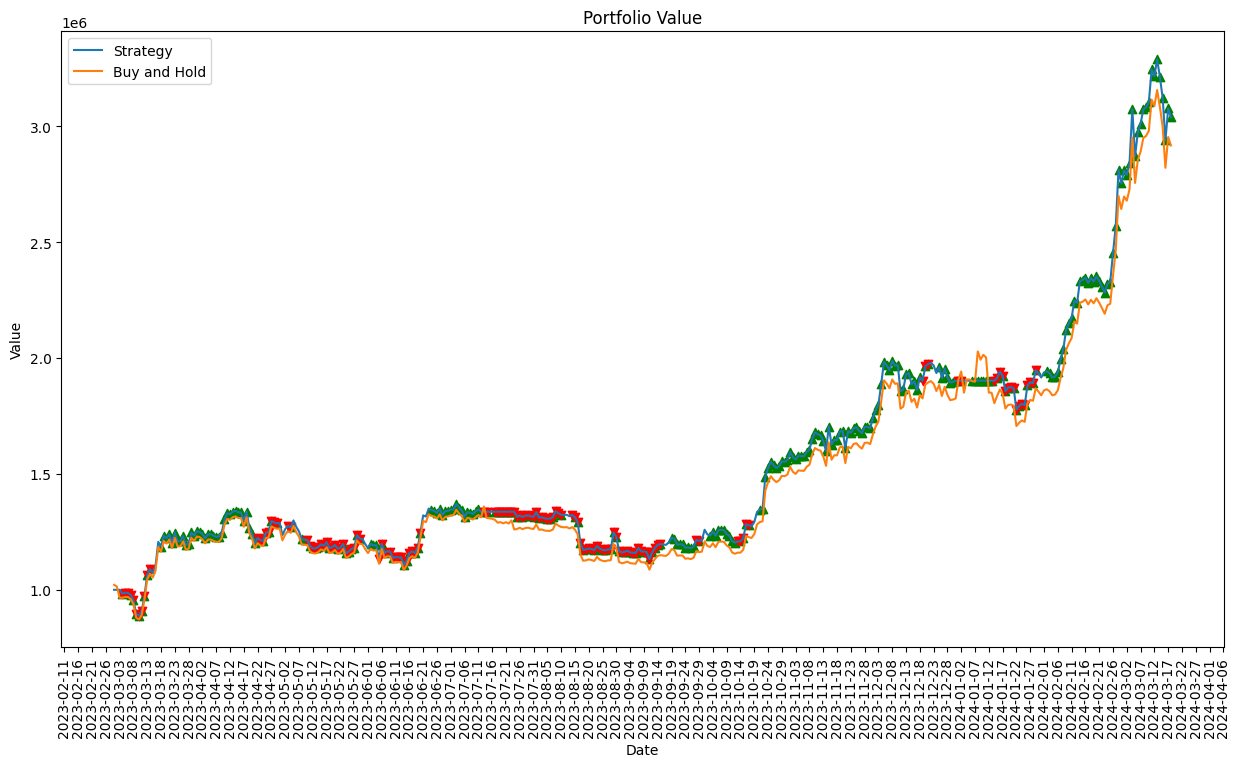

Strategy Sharpe Ratio: 0.13873696982964612
Strategy Max Drawdown: -0.18277118584876673
Strategy Profit: 2039686.71875 

Sharpe Ratio Buy and Hold: 0.12579689735849936
Max Drawdown Buy and Hold: -0.2148138608168947
Profit Buy and Hold: 1917748.6460283217


In [22]:
# use the prdicted moving average to make a trading strategy
results["predicted_direction"] = results["y_pred"].apply(lambda x: 1 if x > 0 else 0)

# if predicted direction is 1 for 15 days in a row, buy
results["buy"] = results["predicted_direction"].shift(1) == 1 & (
    results["predicted_direction"].shift(2) == 1
) & (results["predicted_direction"].shift(3) == 1) & (
    results["predicted_direction"].shift(4) == 1
)


# if predicted direction is 0 for three days in a row, sell
results["sell"] = results["predicted_direction"].shift(1) == 0 & (
    results["predicted_direction"].shift(2) == 0
) & (results["predicted_direction"].shift(3) == 0) & (
    results["predicted_direction"].shift(4) == 0
)

results["closing_price"] = daily_close
results["open_price"] = daily_open


class strategy:
    def __init__(self, cash):
        self.starting_cash = cash
        self.cash = cash
        self.bitcoins = 0
        self.sell_counter = 0
        self.buy_counter = 0

    def buy(self, row):
        if self.sell_counter > 0:
            self.sell_counter -= 1

        if self.cash > row["open_price"] and self.sell_counter == 0:
            # buy bitcoin with all cash
            self.bitcoins += self.cash // row["open_price"]
            # print(self.bitcoins)
            self.cash = 0
            self.buy_counter += 5

    def sell(self, row):
        if self.buy_counter > 0:
            self.buy_counter -= 1

        if self.bitcoins > 0 and self.buy_counter == 0:
            # sell half of bitcoins
            self.cash += self.bitcoins * row["open_price"]
            self.bitcoins = 0
            # print(self.bitcoins)
            self.sell_counter += 10

    def get_cash(self):
        return self.cash

    def get_bitcoins(self):
        return self.bitcoins

    def get_value(self, row):
        return self.cash + self.bitcoins * row["closing_price"]

    def get_profit(self, row):
        return self.get_value(row) - self.starting_cash

    def get_profit_percent(self, row):
        return self.get_profit(row) / self.starting_cash


strat = strategy(1000000)


def apply_strategy(strat, row):
    if row["buy"]:
        strat.buy(row)
    elif row["sell"]:
        strat.sell(row)

    return strat.get_value(row)


results["portfolio_value"] = results.apply(lambda x: apply_strategy(strat, x), axis=1)

# portfolio value if we just bought all  1 million worth of bitcoin on the first day
bitcoins_on_day_1 = 1000000 / results["open_price"].iloc[0]
results["buy_and_hold"] = results["closing_price"] * bitcoins_on_day_1

# plot the portfolio value
plt.plot(results["portfolio_value"])
plt.plot(results["buy_and_hold"])
# plot buy sell signals
plt.scatter(
    results[results["buy"]].index,
    results[results["buy"]]["portfolio_value"],
    marker="^",
    color="g",
)

plt.scatter(
    results[results["sell"]].index,
    results[results["sell"]]["portfolio_value"],
    marker="v",
    color="r",
)

plt.title("Portfolio Value")
plt.legend(["Strategy", "Buy and Hold"])
plt.ylabel("Value")
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 8)
# Set x-axis major ticks to occur every 300 days.
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.show()


results = results.dropna()

# calculate sharpe ratio
daily_returns = results["portfolio_value"].pct_change()
sharpe_ratio = daily_returns.mean() / daily_returns.std()
print(f"Strategy Sharpe Ratio: {sharpe_ratio}")

# calculate max drawdown
cumulative_returns = results["portfolio_value"].pct_change().cumsum()
max_drawdown = cumulative_returns - cumulative_returns.cummax()
max_drawdown = max_drawdown.min()
print(f"Strategy Max Drawdown: {max_drawdown}")

# calculare profit
profit = strat.get_profit(results.iloc[-1])
print(f"Strategy Profit: {profit} \n")

# calculate shgarp ratio for buy and hold
daily_returns = results["buy_and_hold"].pct_change()
sharpe_ratio = daily_returns.mean() / daily_returns.std()
print(f"Sharpe Ratio Buy and Hold: {sharpe_ratio}")

# calculate max drawdown for buy and hold
cumulative_returns = results["buy_and_hold"].pct_change().cumsum()
max_drawdown = cumulative_returns - cumulative_returns.cummax()
max_drawdown = max_drawdown.min()
print(f"Max Drawdown Buy and Hold: {max_drawdown}")

# calculate profit for buy and hold
profit = results["buy_and_hold"].iloc[-1] - 1000000
print(f"Profit Buy and Hold: {profit}")